# Havayolu Yolcu Memnuniyeti Veri Analizi Projesi

Bu proje, Kaggle platformundan temin edilen ["Havayolu Yolcu Memnuniyeti" (Airline Passenger Satisfaction)](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction) veri setini kullanarak kapsamlı bir veri analizi gerçekleştirmeyi amaçlamaktadır. Projenin temel hedefi, yolcu memnuniyetini etkileyen faktörleri belirlemek ve veri analizi becerilerini (istatistiksel özetleme, eksik değer analizi, aykırı değer tespiti ve görselleştirme) uygulamaktır.


## Veri Seti Hakkında

Bu veri seti, bir havayolu şirketinin yolcularına uyguladığı memnuniyet anketinin sonuçlarını içermektedir. Temel amaç, hangi faktörlerin yolcuların memnuniyet düzeyini (memnun, nötr veya memnuniyetsiz) etkilediğini anlamak ve potansiyel olarak yolcu memnuniyetini tahmin edebilecek modeller geliştirmek için bir temel oluşturmaktır.

Veri seti, yolculara ait demografik bilgileri, uçuş detaylarını ve çeşitli hizmetlere yönelik memnuniyet değerlendirmelerini içeren birden fazla değişkenden oluşmaktadır.

### Veri Seti İçeriği (Öznitelikler)

Aşağıda veri setinde bulunan öznitelikler ve açıklamaları listelenmiştir:

* **Gender**: Yolcunun cinsiyeti (Female, Male).
* **Customer Type**: Müşteri tipi (Loyal customer - Sadık Müşteri, disloyal customer - Sadık Olmayan Müşteri).
* **Age**: Yolcunun gerçek yaşı.
* **Type of Travel**: Yolculuğun amacı (Personal Travel - Kişisel Seyahat, Business Travel - İş Seyahati).
* **Class**: Uçaktaki seyahat sınıfı (Business, Eco, Eco Plus).
* **Flight distance**: Bu yolculuğun uçuş mesafesi.
* **Inflight wifi service**: Uçak içi Wi-Fi hizmetinin memnuniyet düzeyi (0: Uygulanamaz; 1-5).
* **Departure/Arrival time convenient**: Kalkış/Varış saati uygunluğunun memnuniyet düzeyi.
* **Ease of Online booking**: Online rezervasyon kolaylığının memnuniyet düzeyi.
* **Gate location**: Kapı konumunun memnuniyet düzeyi.
* **Food and drink**: Yiyecek ve içecek hizmetinin memnuniyet düzeyi.
* **Online boarding**: Online biniş hizmetinin memnuniyet düzeyi.
* **Seat comfort**: Koltuk rahatlığının memnuniyet düzeyi.
* **Inflight entertainment**: Uçak içi eğlence sisteminin memnuniyet düzeyi.
* **On-board service**: Uçak içi genel hizmetin memnuniyet düzeyi.
* **Leg room service**: Bacak mesafesi hizmetinin memnuniyet düzeyi.
* **Baggage handling**: Bagaj hizmetlerinin memnuniyet düzeyi.
* **Check-in service**: Check-in hizmetinin memnuniyet düzeyi.
* **Inflight service**: Uçuş sırasındaki hizmetin memnuniyet düzeyi.
* **Cleanliness**: Uçağın temizliğinin memnuniyet düzeyi.
* **Departure Delay in Minutes**: Kalkıştaki gecikme süresi (dakika).
* **Arrival Delay in Minutes**: Varıştaki gecikme süresi (dakika).
* **Satisfaction**: Havayolu memnuniyet düzeyi (satisfaction - memnun, neutral or dissatisfaction - nötr veya memnuniyetsiz).


### Projenin Adımları

Bu analiz projesi aşağıdaki adımları içerecektir:
1.  **Veri Setinin Yüklenmesi ve İlk Bakış:** Veri setlerinin pandas DataFrame olarak yüklenmesi ve temel yapısının incelenmesi.
2.  **İstatistiksel Özet:** Veri setindeki sayısal ve kategorik değişkenler için merkezi eğilim ve dağılım ölçülerinin hesaplanması.
3.  **Eksik Değer Analizi:** Veri setindeki eksik değerlerin tespit edilmesi ve bu eksikliklerle başa çıkma stratejilerinin değerlendirilmesi.
4.  **Aykırı Değer Analizi:** Sayısal değişkenlerdeki aykırı değerlerin belirlenmesi ve bu değerlerin analize etkilerinin incelenmesi.
5.  **Görselleştirme:** Veriyi daha iyi anlamak ve bulguları sunmak için sayısal ve kategorik değişkenlere uygun grafiklerin oluşturulması.

Bu adımlar, veri setini derinlemesine anlamamıza ve yolcu memnuniyetine etki eden faktörler hakkında değerli içgörüler kazanmamıza yardımcı olacaktır.

### İlk Bakış 

**Gerekli Kütüphanelerin Yüklenmesi**

In [10]:
import pandas as pd # pandas: Veri manipülasyonu ve DataFrame işlemleri için temel kütüphane.
import numpy as np # numpy: Sayısal hesaplamalar ve çok boyutlu dizilerle çalışmak için kullanılır.
import matplotlib.pyplot as plt # matplotlib.pyplot: Temel veri görselleştirme kütüphanesi.
import seaborn as sns # seaborn: matplotlib tabanlı, daha gelişmiş ve estetik istatistiksel görselleştirmeler için.
import missingno as msno # missingno: Eksik veri analizi ve görselleştirme için kullanılır.

**Veri Setlerinin Yüklenmesi**

In [11]:
try:
    train_df = pd.read_csv('train.csv') # train.csv dosyasını pandas DataFrame olarak okuması için.
    test_df = pd.read_csv('test.csv') # test.csv dosyasını pandas DataFrame olarak okuması için.
    print("Veri setleri başarıyla yüklendi!")
except FileNotFoundError:
    #Dosyalar bulunamazsa hata mesajı göstermesi ve programın devam etmesi için boş DataFrame'ler oluşturulması.
    print(f"Hata: Dosyalar bulunamadı. Lütfen dosya yollarını kontrol et: {'train.csv'}, {'test.csv'}")
    train_df = pd.DataFrame()
    test_df = pd.DataFrame()

Veri setleri başarıyla yüklendi!


**Veri Setinin Boyutları**

In [12]:
print(f"Satır Sayısı: {train_df.shape[0]}")
print(f"Sütun Sayısı: {train_df.shape[1]}")

Satır Sayısı: 103904
Sütun Sayısı: 25


Veri seti, 103904 adet yolcuya ve 25 adet özelliğe sahiptir. Bu, analiz yapmak için yeterli büyüklükte bir veri seti olduğunu göstermektedir.

**Veri Setinin İlk 5 Satırı**

In [13]:
print("Veri Setinden İlk 5 Satır:")
display(train_df.head())

Veri Setinden İlk 5 Satır:


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


* Veri setinin ilk beş satırı incelendiğinde, sütun adlarının veri seti tanımında belirtilenlerle uyumlu olduğu görülmektedir.
* Unnamed: 0 ve id sütunları dikkat çekmektedir. Bu sütunların, veri setine muhtemelen otomatik olarak eklenmiş indeks veya kimlik belirteçleri olduğu ve analiz için doğrudan bir katkısı olmayabilir.
* Herhangi bir bariz veri giriş hatası veya beklenmedik karakter (örn: '?', '*') ilk beş satırda gözlemlenmemiştir.

 **Sütun İsimleri ve Veri Tipleri**

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

*Sütun Veri Tipleri*
* Age, Flight Distance, Inflight wifi service gibi çoğu memnuniyet skoru sütunu ve Departure Delay in Minutes beklendiği gibi sayısal (int64) olarak görünmektedir. Toplam 19 adet int64 tipinde sütun bulunmaktadır.
* Arrival Delay in Minutes sütunu float64 veri tipindedir. Bu, ondalıklı değerler içerebileceği anlamına gelir.
* ender, Customer Type, Type of Travel, Class ve hedef değişkenimiz olan satisfaction gibi 5 sütun object veri tipindedir. Bu, bu sütunların metin içerdiği anlamına gelir.
* Unnamed: 0 ve id sütunları da int64 tipindedir ve daha önce belirtildiği gibi analiz için gereksiz görünmektedir.

*Eksik Değerler*
* Çıktıdaki 'Non-Null Count' (Eksik Olmayan Değer Sayısı) sütunu, toplam 103.904 kayda kıyasla incelendiğinde: Arrival Delay in Minutes sütununda 103.594 adet eksik olmayan değer olduğu görülmektedir. Bu durum, bu sütunda (103.904 - 103.594) = 310 adet eksik değer olduğunu göstermektedir.
* Diğer tüm sütunlar tam (103.904 non-null) görünmektedir, yani Arrival Delay in Minutes dışında eksik değere sahip başka bir sütun bulunmamaktadır.

* Veri setinin toplam bellek kullanımı yaklaşık 19.8+ MB olarak raporlanmıştır.

### İstatistiksel Özet

In [15]:
print("\nSayısal Sütunlar İçin İstatistiksel Özet:")
display(train_df.describe().T)


Sayısal Sütunlar İçin İstatistiksel Özet:


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


*Bu tablo, veri setindeki sayısal özelliklerin dağılımı ve merkezi eğilimleri hakkında bize çok değerli bilgiler sunmaktadır.*
* *count*, sütundaki eksik olmayan değerlerin sayısını gösterir. 
    * İstatistiksel özet, Arrival Delay in Minutes sütununda eksik verilerin mevcut olduğunu teyit etmektedir.
* *mean*, sütundaki tüm değerlerin aritmetik ortalamasıdır ve değerlerin genel merkezi hakkında bir fikir verir.
    * Yolcuların ortalama yaşının yaklaşık 39.4 yıl olduğu görülmektedir.
    * Ortalama uçuş mesafesi yaklaşık 1189 birimdir.
    * Hizmet kalitesi değerlendirmelerinde, örneğin Inflight wifi service için ortalama memnuniyet 2.73 iken, Cleanliness için bu değer 3.29'dur. Bu, temizliğin genel olarak Wi-Fi hizmetinden daha yüksek puan aldığını göstermektedir.
* *std*, değerlerin ortalamadan ne kadar saptığını, yani verinin yayılımını gösteren bir ölçüttür. Yüksek standart sapma, verinin geniş bir aralığa yayıldığını; düşük standart sapma ise verinin ortalama etrafında kümelendiğini gösterir.
    * Age (Yaş) sütununun standart sapması yaklaşık 15.11 iken, Flight Distance (Uçuş Mesafesi) sütununun standart sapması yaklaşık 997.15'tir. Bu, uçuş mesafelerindeki değişkenliğin, yolcu yaşlarındaki değişkenliğe göre çok daha fazla olduğunu gösterir.
    * Departure Delay in Minutes (std: 38.07) ve Arrival Delay in Minutes (std: 38.47) sütunlarındaki yüksek standart sapma değerleri, gecikme sürelerinin yolculuktan yolculuğa önemli ölçüde farklılık gösterdiğini, yani bazı uçuşlarda hiç gecikme olmazken bazılarında çok uzun gecikmeler yaşanabildiğini işaret eder. 
* *min*, bir sütundaki en küçük değeri ifade eder. Bu, verinin alt sınırını anlamamıza yardımcı olur.
    * Age sütunundaki minimum değer 7'dir, bu da ankete katılan en genç yolcunun 7 yaşında olduğunu gösterir.
    * Hizmet değerlendirme sütunlarının çoğunda (Inflight wifi service, Food and drink vb.) minimum değerin 0 veya 1 olması, bu değerlendirme skalasının alt sınırını belirtir.
    * Departure Delay in Minutes ve Arrival Delay in Minutes için minimum değerin 0 olması, bazı uçuşların hiç gecikme yapmadığını gösterir.
* *25% (Birinci Çeyrek - Q1)*, veriler küçükten büyüğe sıralandığında, tüm değerlerin %25'inin bu değerden küçük veya ona eşit olduğu noktayı gösterir. Veri dağılımının alt çeyreği hakkında bilgi verir.
    * Age sütununda birinci çeyrek değeri 27.0'dır. Bu, yolcuların %25'inin 27 yaşında veya daha genç olduğu anlamına gelir.
    * Flight Distance için birinci çeyrek değeri 414.0'tür, yani uçuşların %25'i 414 birim veya daha kısa mesafededir.
* *50% (Medyan veya İkinci Çeyrek - Q2)*, veriler sıralandığında tam ortada yer alan değerdir. Medyan, özellikle aykırı değerlerin olduğu çarpık dağılımlarda ortalamaya göre merkezi eğilimi daha iyi yansıtabilir.
    * Age sütununda medyan 40.0 iken, ortalama 39.38'dir. Bu iki değerin birbirine yakın olması, yaş dağılımının görece simetrik olabileceğine işaret eder.
    * Departure Delay in Minutes sütununda medyan 0.0 iken ortalama 14.80'dir. Aradaki bu büyük fark, gecikme verilerinin sağa çarpık olduğunu ve yolcuların en az yarısının kalkışta hiç gecikme yaşamadığını gösterir. Ortalama değer, az sayıdaki yüksek gecikme süresinden etkilenmektedir.
    * Inflight entertainment (Uçuş içi eğlence) için medyan 4.0, ortalama ise 3.36'dır. Bu, yolcuların yarısının uçuş içi eğlenceye 4 veya daha yüksek bir puan verdiğini, ancak daha düşük puanların ortalamayı aşağı çektiğini gösterir.
* *75% (Üçüncü Çeyrek - Q3)*, veriler küçükten büyüğe sıralandığında, tüm değerlerin %75'inin bu değerden küçük veya ona eşit olduğu noktayı gösterir. Veri dağılımının üst çeyreği hakkında bilgi verir.
    * Age sütununda üçüncü çeyrek değeri 51.0'dır. Bu, yolcuların %75'inin 51 yaşında veya daha genç olduğu anlamına gelir (dolayısıyla %25'i 51 yaşından büyüktür).
    * Flight Distance için üçüncü çeyrek değeri 1743.0'tür, yani uçuşların %75'i 1743 birim veya daha kısa mesafededir.
* *max*, bir sütundaki en büyük değeri ifade eder. Bu, verinin üst sınırını ve potansiyel aykırı değerleri tespit etmede yardımcı olur.
    * Age sütunundaki maksimum değer 85'tir, bu da ankete katılan en yaşlı yolcunun 85 yaşında olduğunu gösterir.
    * Departure Delay in Minutes sütunundaki maksimum değer 1592.0 dakika ve Arrival Delay in Minutes sütunundaki maksimum değer 1584.0 dakika gibi oldukça yüksek değerlerdir. Bu değerler, veri setinde uç noktalarda gecikmeler olduğunu ve bunların aykırı değer olarak incelenmesi gerektiğini gösterir.

In [16]:
print("\nKategorik Sütunlar İçin İstatistiksel Özet:")
display(train_df.describe(include=['object']).T)


Kategorik Sütunlar İçin İstatistiksel Özet:


,count,unique,top,freq
Gender,103904,2,Female,52727
Customer Type,103904,2,Loyal Customer,84923
Type of Travel,103904,2,Business travel,71655
Class,103904,3,Business,49665
satisfaction,103904,2,neutral or dissatisfied,58879


*Bu tablo, veri setindeki her bir kategorik (genellikle metin veya object tipi) sütun için aşağıdaki istatistikleri gösterir:*
* *count*, sütundaki eksik olmayan (non-missing) değerlerin sayısını gösterir.
    * Tabloda, tüm kategorik sütunlar için count değeri 103904 olarak görünmektedir yani bu kategorik sütunlarda hiç eksik değer olmadığını gösterir.
* *unique*, sütun içinde kaç farklı kategori veya değer olduğunu gösterir.
    * Gender (Cinsiyet), 2 benzersiz değere sahip. Bu Erkek ve Kadın kategorilerini ifade eder.
    * Customer Type (Müşteri Tipi), 2 benzersiz değere sahip. Sadık Müşteri (Loyal Customer) ve Sadık Olmayan Müşteri (disloyal Customer) şeklindedir.
    * Type of Travel (Seyahat Tipi), 2 benzersiz değere sahip. İş Seyahati (Business travel) ve Kişisel Seyahat (Personal Travel) şeklindedir.
    * Class (Uçuş Sınıfı), 3 benzersiz değere sahip. Bunlar Ekonomi (Eco), Ekonomi Artı (Eco Plus) ve Business gibi sınıflardır.
    * satisfaction (Memnuniyet), 2 benzersiz değere sahip. Bunlar Memnun (satisfied) ve Nötr veya Memnun Değil (neutral or dissatisfied) gibi iki durumu ifade eder.
* *top*, sütun içinde en çok tekrar eden kategoriyi belirtir.
    * Gender sütununda en sık görülen kategori Female'dir, Customer Type sütununda en sık görülen kategori Loyal Customer'dır, Type of Travel sütununda en sık görülen kategori Business travel'dır, Class sütununda en sık görülen kategori Business'dir, satisfaction sütununda en sık görülen kategori neutral or dissatisfied'dir.
* *freq*, top olarak belirtilen kategorinin veri setinde kaç kez geçtiğini belirtir. Bu değer, toplam count ile oranlanarak kategorinin veri seti içindeki yüzdesel ağırlığı hakkında bilgi verir.
    * Gender (Cinsiyet) sütununda en sık görülen Female kategorisi 52727 kez tekrarlanmaktadır. Bu, toplam yolcuların %50.75'inin (52727 / 103904 * 100) Female olduğunu gösterir.
    * Customer Type (Müşteri Tipi) sütununda en sık görülen Loyal Customer kategorisi 84923 kez tekrarlanmaktadır. Bu, yolcuların %81.73'ünün (84923 / 103904 * 100) Loyal Customer olduğunu gösterir.
    * Type of Travel (Seyahat Tipi) sütununda en sık görülen Business travel kategorisi 71655 kez tekrarlanmaktadır. Bu, seyahatlerin %68.96'sının (71655 / 103904 * 100) Business travel olduğunu gösterir.
    * Class (Uçuş Sınıfı) sütununda en sık görülen Business kategorisi 49665 kez tekrarlanmaktadır. Bu, yolcuların %47.80'inin (49665 / 103904 * 100) Business sınıfında seyahat ettiğini gösterir.
    * satisfaction (Memnuniyet) sütununda en sık görülen neutral or dissatisfied kategorisi 58879 kez tekrarlanmaktadır. Bu, yolcuların %56.67'sinin (58879 / 103904 * 100) memnuniyet durumunun neutral or dissatisfied olduğunu gösterir.

In [26]:
print("Kategorik Değişkenlerin Frekans Dağılımları:")
print("-" * 40)

for col in train_df.select_dtypes(include='object').columns:
    print(f"\nDeğişken: {col}")
    print(train_df[col].value_counts())
    print(f"En Yaygın Kategori ({col}): {train_df[col].mode()[0]} ({train_df[col].value_counts().max()} adet)")
    print(f"Toplam Benzersiz Değer ({col}): {train_df[col].nunique()}")
    print("-" * 50)

Kategorik Değişkenlerin Frekans Dağılımları:
----------------------------------------

Değişken: Gender
Female    52727
Male      51177
Name: Gender, dtype: int64
En Yaygın Kategori (Gender): Female (52727 adet)
Toplam Benzersiz Değer (Gender): 2
--------------------------------------------------

Değişken: Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64
En Yaygın Kategori (Customer Type): Loyal Customer (84923 adet)
Toplam Benzersiz Değer (Customer Type): 2
--------------------------------------------------

Değişken: Type of Travel
Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64
En Yaygın Kategori (Type of Travel): Business travel (71655 adet)
Toplam Benzersiz Değer (Type of Travel): 2
--------------------------------------------------

Değişken: Class
Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64
En Yaygın Kategori (Class): Business (49665 adet)
Toplam Benzers

Kategorik değişkenlerin her bir sınıfının dağılımını *value_counts()* incelemek, veri setindeki sınıfların dengesini ve dominant kategorileri anlamak açısından yapılmıştır. Bu analiz, özellikle hedef değişkenimiz olan satisfaction gibi değişkenlerdeki sınıf dengesini gözlemlememizi sağlar ve olası dengesiz veri seti sorunlarına (imbalanced dataset) karşı önceden fikir edinmemizi sağlar. Ayrıca Customer Type, Type of Travel ve Class gibi değişkenlerin frekansları, müşteri segmentasyonuna dair ilk ipuçlarını sunar.

Yukarıdaki frekans dağılımları incelendiğinde, veri setimizdeki temel kategorik değişkenler hakkında aşağıdaki çıkarımlar yapılabilir:

* *Gender:* Veri setindeki kadın ve erkek yolcu sayıları birbirine oldukça yakın ve dengeli bir dağılım göstermektedir. Bu, cinsiyetin veri setinde önemli bir yanlılık kaynağı olmadığını ve her iki cinsiyet grubunun da yeterince temsil edildiğini göstermektedir.

* *Customer Type:* Yolcuların büyük çoğunluğunun sadık müşteri olduğu, sadık olmayan müşteri sayısının ise daha az olduğu görülmektedir. Bu durum, havayolu şirketinin müşteri tabanının büyük ölçüde sadık müşterilerden oluştuğunu veya anketin daha çok sadık müşterilere uygulandığını düşündürebilir. Sadık ve sadık olmayan müşteri grupları arasındaki bu dengesizlik, ileriki analizlerde müşteri tipi bazında memnuniyet farklılıklarını incelerken göz önünde bulundurulmalıdır.

* *Type of Travel:* İş seyahati yapan yolcuların, kişisel seyahat yapan yolculardan belirgin şekilde daha fazla olduğu anlaşılmaktadır. Bu, veri setinin daha çok iş seyahati yapan yolcuların deneyimlerini yansıttığını ve havayolu şirketinin ana müşteri segmentinin iş dünyasından geldiğini gösterebilir. Seyahat tipinin memnuniyet üzerindeki etkileri, modelleme aşamasında önemli bir faktör olabilir.

* *Class:* Yolcuların en çok Business ve Eco sınıflarında seyahat ettiği, Eco Plus sınıfının ise diğerlerine göre çok daha az tercih edildiği gözlemlenmektedir. İş ve Ekonomi sınıfları arasında sayıca benzerlik olması, her iki sınıfın da müşteri memnuniyeti üzerindeki etkilerini karşılaştırmak için yeterli veri sağladığını göstermektedir. Eco Plus sınıfının düşük temsili, bu sınıf özelinde yapılacak derinlemesine analizleri kısıtlayabilir.

* *satisfaction:* Hedef değişkenimiz olan satisfaction incelendiğinde, nötr veya memnuniyetsiz yolcu sayısının, memnun yolcu sayısından daha fazla olduğu görülmektedir. Bu, veri setinde hafif bir sınıf dengesizliği (class imbalance) olduğunu işaret etmektedir; memnuniyetsiz veya nötr olan yolcuların oranı, memnun olanlardan yaklaşık %13 daha fazladır ($ \frac{58879 - 45025}{45025} \approx 0.30 $ değil, $ \frac{58879}{45025} \approx 1.30 $ katıdır, yani 1.3 katı kadar fazla). Bu dengesizlik, sınıflandırma modelleri oluşturulurken dikkate alınmalı ve gerektiğinde dengeleme teknikleri düşünülebilir.

**Gereksiz Sütunların Kaldırılması**

In [18]:
train_df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)
print("Gereksiz sütunlar kaldırıldı.")
print("Train veri setinin yeni boyutları:", train_df.shape)

Gereksiz sütunlar kaldırıldı.
Train veri setinin yeni boyutları: (103904, 23)


Veri setimizdeki Unnamed: 0 (tekrarlayan indeks) ve id (benzersiz yolcu tanımlayıcı) sütunları, memnuniyet analizi veya modellemesi için anlamlı öznitelikler sunmamaktadır. Analizi sadeleştirmek ve yanıltıcı ilişkileri önlemek amacıyla bu iki sütun, veri setlerinden kalıcı olarak çıkarılmıştır. Bu işlemle veri setindeki sütun sayısı 23'e inmiştir.

### Eksik Değer Analizi (Arrival Delay in Minutes)

In [19]:
# Eksik değerlerin sayısını ve yüzdesini kontrol etmek için.
missing_values = train_df['Arrival Delay in Minutes'].isnull().sum()
missing_percentage = (missing_values / len(train_df)) * 100 

print(f"'Arrival Delay in Minutes' sütunundaki eksik değer sayısı: {missing_values}")
print(f"'Arrival Delay in Minutes' sütunundaki eksik değer yüzdesi: {missing_percentage:.2f}%")

'Arrival Delay in Minutes' sütunundaki eksik değer sayısı: 310
'Arrival Delay in Minutes' sütunundaki eksik değer yüzdesi: 0.30%


Bu çıktılar, Arrival Delay in Minutes sütununda daha önce de gözlemlediğimzi gibi 310 adet eksik veri olduğunu ve bunun tüm veri setinin yaklaşık %0.30'una karşılık geldiğini göstermektedir. Bu oran, veri setinin geneline kıyasla düşük kabul edilebilir.

In [20]:
# Eksik değerlere sahip satırların Departure Delay in Minutes sütunundaki istatistiklerini görüntülemek için.
missing_arrival_delay_df = train_df[train_df['Arrival Delay in Minutes'].isnull()] #Arrival Delay in Minutes sütununda eksik değere sahip olan tüm satırları filtreleyerek missing_arrival_delay_df adında yeni bir DataFrame oluşturur.
print("\n'Arrival Delay in Minutes' değeri eksik olan satırlarda 'Departure Delay in Minutes' istatistikleri:") 
display(missing_arrival_delay_df['Departure Delay in Minutes'].describe()) #Eksik değerlere sahip satırların Departure Delay in Minutes sütunundaki istatistiklerini görüntülemek için.


'Arrival Delay in Minutes' değeri eksik olan satırlarda 'Departure Delay in Minutes' istatistikleri:


count    310.000000
mean      37.432258
std       62.239283
min        0.000000
25%        0.000000
50%        8.000000
75%       47.500000
max      455.000000
Name: Departure Delay in Minutes, dtype: float64

Bu analiz, varış gecikmesi bilgisi olmayan uçuşların kalkış gecikmeleri açısından belirli bir eğilim gösterip göstermediğini anlamamıza yardımcı olur. 
* Varış gecikmesi eksik olan 310 satırda da kalkış gecikmesi bilgisi mevcut.
* Bu 310 uçuşun ortalama kalkış gecikmesi yaklaşık 37 dakika.
* Standart sapmanın yüksek olması, kalkış gecikmelerinde değişkenliğin olduğunu gösterir.
* Varış gecikmesi eksik olan bazı uçuşlar, kalkışta hiç gecikme yaşamamış.
* Bu uçuşların en az %25'i kalkışta hiç gecikmemiş.
* Medyan kalkış gecikmesi 8 dakika.
* Varış gecikmesi eksik olan bir uçuşta 455 dakikalık (yaklaşık 7.5 saat) bir kalkış gecikmesi yaşanmış.

Bu istatistikler, varış gecikmesi eksik olan durumların sadece kalkışta gecikme olmayanlarla sınırlı olmadığını, çeşitli kalkış gecikme senaryolarını içerdiğini gösterir. Ancak medyanın ortalamadan düşük olması, bazı yüksek kalkış gecikmelerinin ortalamayı yukarı çektiğini, ancak genel olarak daha düşük kalkış gecikmelerinin de bu grupta yaygın olduğunu gösterir.

In [21]:
print("\nKalkışta gecikme olmayan ve varış gecikmesi eksik olan yolcu sayısı:")
print(missing_arrival_delay_df[missing_arrival_delay_df['Departure Delay in Minutes'] == 0].shape[0]) #  missing_arrival_delay_df DataFrame içinden kalkış gecikmesi tam olarak 0 dakika olan satırları seçer.


Kalkışta gecikme olmayan ve varış gecikmesi eksik olan yolcu sayısı:
116


Bu sonuç, varış gecikmesi bilgisi eksik olan 310 yolcudan 116'sının aslında kalkışta hiç gecikme yaşamadığını göstermektedir. Bu, toplam eksiklerin yaklaşık %37'sine denk gelir ve dikkate değer bir orandır. Bu durum, eksikliklerin bir kısmının "kalkışta gecikme yoksa varışta da önemli bir gecikme beklenmez ve bu nedenle veri girilmemiş olabilir" çıkarımına dair bir ipucu sunar.

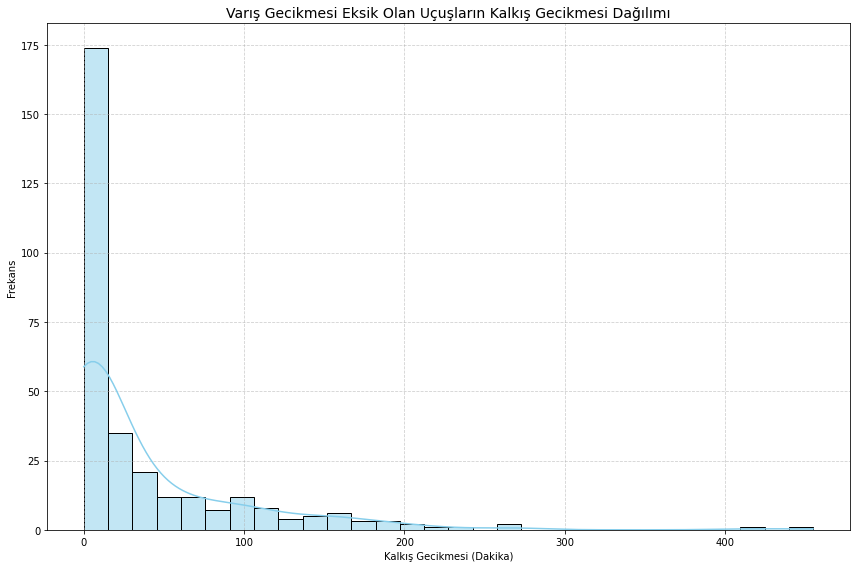

In [22]:
missing_arrival = train_df[train_df['Arrival Delay in Minutes'].isna()]

plt.figure(figsize=(12,8))
sns.histplot(missing_arrival['Departure Delay in Minutes'], kde=True, bins=30, color='skyblue')
plt.title("Varış Gecikmesi Eksik Olan Uçuşların Kalkış Gecikmesi Dağılımı", fontsize=14)
plt.xlabel("Kalkış Gecikmesi (Dakika)")
plt.ylabel("Frekans")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

Grafik, Arrival Delay in Minutes verisi eksik olan 310 uçuşun kalkış gecikmesi dağılımını göstermektedir. Dağılımın sağa çarpık (right-skewed) olması, az sayıda uçuşun ciddi kalkış gecikmeleri yaşadığını ortaya koymaktadır. Hem bu yüksek gecikmeli uçuşların varlığı hem de zamanında kalkan uçuşların yoğunluğu, eksik verilerin tek tip bir uçuş profiline ait olmadığını, aksine çeşitli gecikme durumlarını içerdiğini doğrulamaktadır.

In [23]:
#Eksik varış gecikmesi olan satırlarda Satisfaction (Müşteri Memnuniyeti) dağılımı için.
print("\n'Arrival Delay in Minutes' eksik olan satırlarda Satisfaction dağılımı:")
display(missing_arrival_delay_df['satisfaction'].value_counts(normalize=True) * 100) #missing_arrival_delay_df DataFrame içinden Satisfaction sütununun değerlerini alır ve normalize=True parametresi ile yüzdesel dağılımı görüntüler.

print("\nTüm veri setindeki Satisfaction dağılımı (karşılaştırma için):")
display(train_df['satisfaction'].value_counts(normalize=True) * 100) #train_df DataFrame içinden Satisfaction sütununun değerlerini alır ve normalize=True parametresi ile yüzdesel dağılımı görüntüler.


'Arrival Delay in Minutes' eksik olan satırlarda Satisfaction dağılımı:


neutral or dissatisfied    58.709677
satisfied                  41.290323
Name: satisfaction, dtype: float64


Tüm veri setindeki Satisfaction dağılımı (karşılaştırma için):


neutral or dissatisfied    56.666731
satisfied                  43.333269
Name: satisfaction, dtype: float64

Bu karşılaştırmada dikkat çeken en önemli nokta, Arrival Delay in Minutes verisi eksik olan durumlarda "neutral or dissatisfied" (nötr veya memnuniyetsiz) yolcu oranının, tüm veri setine kıyasla yaklaşık %2 daha yüksek olmasıdır (58.71% vs. 56.67%). Buna paralel olarak, "satisfied" (memnun) yolcu oranı ise eksik veriye sahip satırlarda yaklaşık %2 daha düşüktür (41.29% vs. 43.33%).
* Varış gecikmesi bilgisinin kaydedilemediği durumlar, yolcuların genellikle olumsuz bir deneyim yaşadığı ve bu nedenle memnuniyetsizliğe meyilli olduğu durumlarla örtüşüyor olabilir.
* Belki de ciddi gecikmelerde (ki bu durum memnuniyeti düşürür) veri kaydı eksik kalmıştır. Yani, gecikme ne kadar büyükse, bu bilginin kaydının o kadar zor veya eksik olma ihtimali olabilir.

Bu analiz, Arrival Delay in Minutes sütunundaki eksik verilerin rastgele olmadığını, aksine yolcu memnuniyeti ile ilişkili olabileceğini düşündürmektedir.

In [24]:
#Eksik varış gecikmesi olan satırlarda Class (Uçuş Sınıfı) dağılımı için.
print("\n'Arrival Delay in Minutes' eksik olan satırlarda Class dağılımı:")
display(missing_arrival_delay_df['Class'].value_counts(normalize=True) * 100) #missing_arrival_delay_df DataFrame içinden Class sütununun değerlerini alır ve normalize=True parametresi ile yüzdesel dağılımı görüntüler.

print("\nTüm veri setindeki Class dağılımı (karşılaştırma için):")
display(train_df['Class'].value_counts(normalize=True) * 100) #train_df DataFrame içinden Class sütununun değerlerini alır ve normalize=True parametresi ile yüzdesel dağılımı görüntüler.


'Arrival Delay in Minutes' eksik olan satırlarda Class dağılımı:


Eco         49.032258
Business    42.580645
Eco Plus     8.387097
Name: Class, dtype: float64


Tüm veri setindeki Class dağılımı (karşılaştırma için):


Business    47.798930
Eco         44.988643
Eco Plus     7.212427
Name: Class, dtype: float64

* Eco sınıfında seyahat eden yolcular arasında, varış gecikmesi verisi eksik olanların oranı (%49.03), genel Eco sınıfı yolcu oranından (%44.99) biraz daha yüksektir. Bu, Eco sınıfında varış gecikmesi bilgisinin eksik olma olasılığının diğer sınıflara göre bir miktar daha fazla olabileceğini gösterir.
* Business sınıfında ise durum tersinedir. Varış gecikmesi eksik olanlar arasındaki Business sınıfı oranı (%42.58), genel Business sınıfı oranından (%47.80) daha düşüktür. Bu da Business sınıfı uçuşlarda varış gecikmesi verilerinin daha eksiksiz tutuluyor olabileceğine işaret eder.
* Eco Plus sınıfında ise oranlar birbirine oldukça yakındır (eksiklerde %8.39, genelde %7.21). Bu sınıfta eksiklik açısından belirgin bir farklılaşma gözlenmemektedir.

Bu karşılaştırma, Arrival Delay in Minutes sütunundaki eksikliğin tamamen rastgele olmayabileceğini, uçuş sınıfı gibi faktörlerle zayıf da olsa bir ilişkisi olabileceğini göstermektedir.

In [25]:
#Eksik varış gecikmesi olan satırlarda Customer Type (Müşteri Tipi) dağılımı için.
print("\n'Arrival Delay in Minutes' eksik olan satırlarda Customer Type dağılımı:")
display(missing_arrival_delay_df['Customer Type'].value_counts(normalize=True) * 100) #missing_arrival_delay_df DataFrame içinden Customer Type sütununun değerlerini alır ve normalize=True parametresi ile yüzdesel dağılımı görüntüler.

print("\nTüm veri setindeki Customer Type dağılımı (karşılaştırma için):")
display(train_df['Customer Type'].value_counts(normalize=True) * 100) #train_df DataFrame içinden Customer Type sütununun değerlerini alır ve normalize=True parametresi ile yüzdesel dağılımı görüntüler.


'Arrival Delay in Minutes' eksik olan satırlarda Customer Type dağılımı:


Loyal Customer       84.193548
disloyal Customer    15.806452
Name: Customer Type, dtype: float64


Tüm veri setindeki Customer Type dağılımı (karşılaştırma için):


Loyal Customer       81.732176
disloyal Customer    18.267824
Name: Customer Type, dtype: float64

* Loyal Customer (Sadık Müşteri) kategorisinde, varış gecikmesi verisi eksik olanların oranı (%84.19), genel sadık müşteri oranından (%81.73) bir miktar daha yüksektir. Bu, sadık müşterilerde varış gecikmesi bilgisinin eksik olma olasılığının, sadık olmayan müşterilere göre biraz daha fazla olabileceğini düşündürmektedir.
* disloyal Customer (Sadık Olmayan Müşteri) kategorisinde ise durum tersinedir. Varış gecikmesi eksik olanlar arasındaki sadık olmayan müşteri oranı (%15.81), genel sadık olmayan müşteri oranından (%18.27) daha düşüktür.

Bu karşılaştırma, Arrival Delay in Minutes sütunundaki eksikliğin müşteri tipi ile de zayıf bir ilişkisi olabileceğini göstermektedir. Sadık müşterilerde eksik veri oranının bir nebze daha yüksek, sadık olmayan müşterilerde ise bir nebze daha düşük olması, veri toplama veya kayıt süreçlerinde müşteri tipine bağlı farklar olabileceğine ya da sadık olmayan müşterilerin verilerinin bir şekilde daha eksiksiz olmasına yol açan dolaylı bir etkenin varlığına işaret edebilir. Ancak, yüzdesel farklar çok büyük olmadığından, bu yorumlar ihtiyatla ele alınmalıdır.

*Arrival Delay in Minutes sütunundaki eksik veriler (%0.30 gibi düşük bir oranda olsa da) tamamen rastgele dağılmamıştır. Bu eksiklik, özellikle kalkışta gecikme yaşayan, memnuniyetsizliğe daha yatkın ve genellikle Ekonomi sınıfında seyahat eden yolcularla bir miktar ilişkilidir. Bu durum, eksik verilerin basitçe göz ardı edilmesi (silinmesi) veya genel ortalama/medyan ile doldurulması durumunda veri setine küçük de olsa bir yanlılık (bias) ekleyebileceğini göstermektedir. Bu nedenle, eksik verileri doldurma (imputation) stratejisi seçilirken bu bulgular göz önünde bulundurulmalıdır.*

**Eksik Değer Analizi Sonuçları ve Öneriler**

Yapılan eksik değer analizi sonucunda, veri setinde sadece *Arrival Delay in Minutes* sütununda %0.30 gibi düşük bir oranda eksik değer bulunduğu tespit edilmiştir. *Unnamed: 0* ve *id* sütunları ise analiz dışı bırakılacak değişkenler olarak değerlendirilmiştir.

En önemli bulgu, *Arrival Delay in Minutes* sütunundaki eksik verilerin tamamen rastgele dağılmadığıdır. Bu eksikliklerin, özellikle kalkışta gecikme yaşayan, memnuniyetsizliğe daha yatkın ve genellikle Ekonomi sınıfında seyahat eden yolcularla bir miktar ilişkili olduğu gözlemlenmiştir. Bu durum, eksik verilerin basitçe silinmesi veya genel ortalama/medyan ile doldurulması durumunda veri setine küçük de olsa bir yanlılık bias ekleyebileceğini göstermektedir.

Projenin kapsamı ve veri setindeki eksik değer oranının düşüklüğü göz önüne alındığında, başlangıç olarak basit doldurma yöntemlerinden (örn. ortalama/medyan ile doldurma veya basitçe silme) birini tercih edip, modelleme aşamasında performans düşüşü gözlemlenirse daha ileri düzey yöntemleri (KNN veya regresyon tabanlı doldurma) denemek daha pratik olabilir. Eksik değerlerin rastgele olmaması bulgusu, ileride bu doldurma stratejilerinin etkilerini dikkatlice değerlendirme ihtiyacını ortaya koymaktadır. 

Bence, *Arrival Delay in Minutes* sütununda tespit edilen %0.30'luk düşük eksik değer oranı göz önüne alındığında, ilgili satırların satır bazında silme (listwise deletion) yöntemiyle veri setinden çıkarılması, bilgi kaybını kabul edilebilir bir düzeyde tutarken analitik süreçlerin karmaşıklığını artırmadan etkin bir çözüm sağlayacaktır. Bu düzeydeki bir veri kaybının model performansını anlamlı derecede etkilemesi beklenmemektedir.